## Chapter 2 

### Introducing pandas objects

In [47]:
import numpy as np
import pandas as pd

In [48]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [49]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [50]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [51]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [114]:
# states[:1]# 第1行 # must be a subset. 
# states.iloc[2] # 第二行

states.iloc[[1]] # in dataframe form, 第二行

#--------------------------------------------


states['population'] # 列

states[states.columns[0:2]] # select from columns# must be a range

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [121]:
import sys
print(sys.path)
sys.executable

['/Users/fyenne/Downloads/booooks/semester5/pythonAAE/py_handbook', '/Users/fyenne/anaconda3/lib/python37.zip', '/Users/fyenne/anaconda3/lib/python3.7', '/Users/fyenne/anaconda3/lib/python3.7/lib-dynload', '', '/Users/fyenne/anaconda3/lib/python3.7/site-packages', '/Users/fyenne/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/fyenne/.ipython']


'/Users/fyenne/anaconda3/bin/python'

## Machine Leaning in Python.

### scikit learn

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

TypeError: 'data' must be pandas DataFrame object, not: <class 'sklearn.utils.Bunch'>

---
***makeing X and y to predictions.***

In [98]:
X_iris = iris.drop('species', axis=1)
X_iris.shape
y_iris = iris['species']
# y_iris.shape

---
simple example

In [212]:
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

In [213]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [214]:
MultinomialNB()
print(clf.predict(X[2:3]))

[3]


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

---
simple example done; iris prediction continued:

---
***vectorize.***


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [140]:
from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer(sparse=True, dtype=int)
# vec.fit_transform(yy)

In [168]:
iris_new = pd.get_dummies(iris, columns = ['species'], drop_first = False)

In [175]:
iris_new.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [179]:
X = np.array(iris_new.iloc[:,0:4])
y = np.array(iris_new.iloc[:, 4:])

In [197]:
iris.iloc[:, 4]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

---
***train the model***

In [193]:
model = GaussianNB() 

In [198]:
model.fit(X , iris.iloc[:, 4])

GaussianNB()

In [203]:
model.predict(X[4:5])

array(['setosa'], dtype='<U10')

---
***做的乱七八糟, 但相当于把iris naive classification 重做了***

### another example


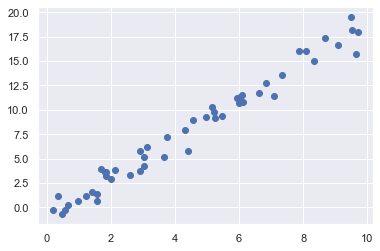

In [36]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [4]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression(fit_intercept=True)
model
X = x[:, np.newaxis]
X.shape
model.fit(X, y)

LinearRegression()

In [26]:
(model.coef_ , model.intercept_)

(array([1.9776566]), -0.9033107255311164)

In [5]:
import statsmodels.api as sm
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
# Print out the statistics
model.summary()

NameError: name 'X' is not defined

### scikit predict

In [38]:
xfit = np.linspace(-1, 11) # 有序数据集合? 
# numpy.linspace(start, stop, 
# num=50, endpoint=True, retstep=False, dtype=None, axis=0)

In [41]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

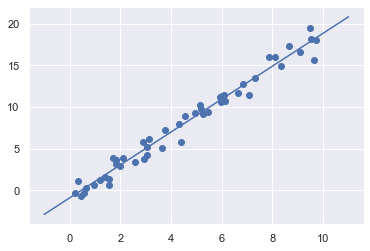

In [42]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## --------------------------------------------


## Gaussian Naive Bayes classification.

In [6]:
from sklearn.model_selection import train_test_split

In [190]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X_iris, y_iris, random_state=1)

In [7]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)   

NameError: name 'Xtrain' is not defined

In [192]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## multinomial naive bayes (text classificaiton)


In [39]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [38]:
data.summary #信件含有以上内容的主题

AttributeError: summary

In [20]:
categories = [
    'talk.religion.misc', 'soc.religion.christian', 'sci.space',
    'comp.graphics'
]
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
# subset are contained in original data.
# the content is fixed/.

In [25]:
# print(train.data[5]) # seems to be religious

# train.target

array([2, 2, 1, ..., 2, 3, 1])

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [79]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

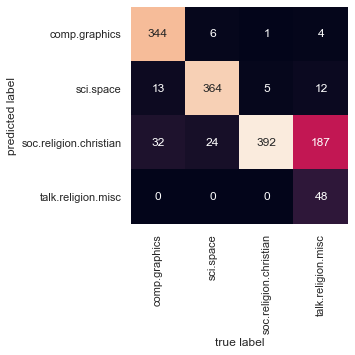

In [82]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)    
plt.xlabel('true label')
plt.ylabel('predicted label');

In [86]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]
#write a function

In [1]:
predict_category('moon is over my head, my god, my lord')

NameError: name 'predict_category' is not defined

## --------------------------------------------


## a knn classifier using iris.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [6]:
model.fit(X, y)
y_model = model.predict(X)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [8]:
from sklearn.model_selection import train_test_split
# No module named 'sklearn.cross_validation'
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.75)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9736842105263158

## k-fold validation and leave one out -- validation.

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=7)

array([0.95454545, 1.        , 0.90909091, 0.95238095, 0.9047619 ,
       1.        , 1.        ])

In [12]:
cross_val_score(model, X, y, cv=7).mean()

0.9601113172541744

In [10]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())

In [11]:
scores.mean()

0.96

## Validation curve plot

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs): # 对未知数量的输入, 如a, positional argument后所有关键词参数的字典。
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [16]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [19]:
df = pd.DataFrame(X)

In [20]:
df['y'] = y

In [21]:
df = df.rename(columns = {0: 'X', 'y' : 'y'})

<AxesSubplot:xlabel='X', ylabel='y'>

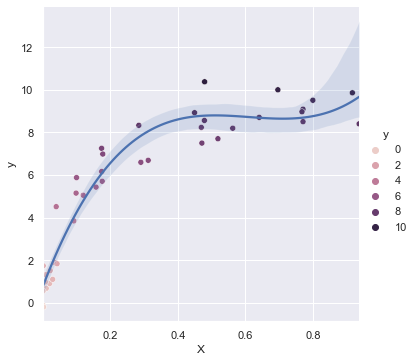

In [24]:
sns.relplot(x = df.X, y = df.y, hue = df.y)

sns.regplot(x = 'X', 
           y = 'y', 
           data = df,
           scatter = False,
            order = 3
)

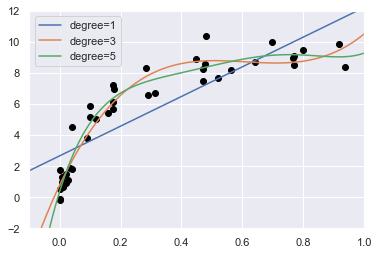

In [25]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [26]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None] #(500, 1)
 # np.linspace(-0.1, 1.1, 500).shape #(500,)

### learning curve

In [1]:
from pprint import pprint
from math import sqrt

In [2]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

NameError: name 'make_data' is not defined

In [62]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)



/Users/fyenne/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


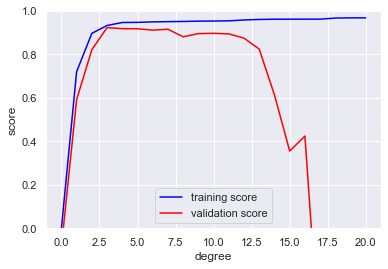

In [52]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [50]:
X2.ravel().shape, X2.shape, "---", np.linspace(-0.1, 1.1, 500)[:, None].shape, np.linspace(-0.1, 1.1, 500).shape #(500, 1)



((200,), (200, 1), '---', (500, 1), (500,))

In [87]:
PolynomialRegression().fit(X,y);

In [76]:
train_score.max()

0.9818559303501744

In [86]:
pd.DataFrame(val_score).mean(axis =0)

0    7.285760e-01
1    5.407115e-01
2    3.585797e-01
3   -4.076929e+09
4   -1.663682e+06
5   -2.347070e+07
6   -2.969232e+02
dtype: float64

---
abort now

## feature engineering

In [26]:
# fast dummy sort of

In [32]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

In [30]:
# data = pd.DataFrame(data) 
# it must be an list type to transform'

In [33]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [36]:
data2 = pd.DataFrame(data)

In [37]:
data2

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


In [41]:
pd.concat([data2, pd.get_dummies(data2.neighborhood)], 1) #
# the same shit

,price,rooms,neighborhood,Fremont,Queen Anne,Wallingford
0,850000,4,Queen Anne,0,1,0
1,700000,3,Fremont,1,0,0
2,650000,3,Wallingford,0,0,1
3,600000,2,Fremont,1,0,0


## text features

In [42]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [44]:
import pandas as pd # it was initially set as vec(sparse = T)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [129]:
print(X)

  (0, 0)	0.5178561161676974
  (0, 2)	0.680918560398684
  (0, 3)	0.5178561161676974
  (1, 4)	0.7959605415681652
  (1, 0)	0.6053485081062916
  (2, 1)	0.7959605415681652
  (2, 3)	0.6053485081062916
